In [2]:
library('tidyverse')
library('rvest')
library('lubridate')
library('scales')
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [3]:
scrape_table = function(i, MF='Women\'s') {
    url = "https://www.baa.org/races/boston-marathon/results/champions"
    webpage = xml2::read_html(url)
    tbl = html_nodes(webpage, "table")[[i]] %>%
        html_table() %>%
        drop_na() %>%
        magrittr::set_colnames(c('year', 'name', 'country', 'time')) %>%
        mutate(time = hms(time)) %>%
        mutate(race.time = as.numeric(time, 'hours')) %>%
        mutate(MF = MF) %>%
        mutate(
            country.simple = ifelse(
                country %in% c('United States', 'Ethiopia', 'Japan', 'Kenya'),
                country,
                'other'
            )
        )
    tbl
}

df.men = scrape_table(1, MF='Men\'s')
df.women = scrape_table(2)

df.marathon = rbind(df.men, df.women)

Let's re-create this chart from FiveThirtyEight

<center>
    <img src="https://fivethirtyeight.com/wp-content/uploads/2018/04/wezerek-marathon-0416-13.png"
         style="width: 600px;"/>
</center>

Preview the data (i.e. `df.marathon`).

In [4]:
df.marathon |> head()

year,name,country,time,race.time,MF,country.simple
<int>,<chr>,<chr>,<Period>,<dbl>,<chr>,<chr>
2022,Evans Chebet,Kenya,2H 6M 51S,2.114167,Men's,Kenya
2021,Benson Kipruto,Kenya,2H 9M 51S,2.164167,Men's,Kenya
2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia


Fill in the table below:

| chart property | column name |
| --- | --- |
| x value | year |
| y value | race.time |
| color | country.simple |
| facet value | MF |
| scale | free_x |
| y label | Winning Time |
| legend | nolegend

Make note of other aesthetic decisions. 
- What's the y-axis title?
- Do the two charts share the same x-axis bounds?
- Is there a legend?

Code your version of the chart below.

In [45]:
winners_2018 = df.marathon |> filter(year == 2018)
winners_2018
four_countries = df.marathon |> filter(country %in% c('United States', 'Ethiopia', 'Japan', 'Kenya'))
four_countries

year,name,country,time,race.time,MF,country.simple
<int>,<chr>,<chr>,<Period>,<dbl>,<chr>,<chr>
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2018,Desiree Linden,United States,2H 39M 54S,2.665000,Women's,United States


year,name,country,time,race.time,MF,country.simple
<int>,<chr>,<chr>,<Period>,<dbl>,<chr>,<chr>
2022,Evans Chebet,Kenya,2H 6M 51S,2.114167,Men's,Kenya
2021,Benson Kipruto,Kenya,2H 9M 51S,2.164167,Men's,Kenya
2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States
2013,Lelisa Desisa,Ethiopia,2H 10M 22S,2.172778,Men's,Ethiopia


In [35]:
country_names = data.frame(                         #Create a dataset
    country = c('United States', 'Japan', 'Kenya', 'United States', 'Ethiopia', 'Kenya'), 
    #in R when you creat columns / series of values use this C() function
    year = c(1915, 1955, 1990, 1979, 2000, 2010),
    race.time = c(2.75, 2.25, 2, 3, 2.33, 2.2),
    MF = c("Men's", "Men's", "Men's", "Women's", "Women's", "Women's")
)

country_names

country,year,race.time,MF
<chr>,<dbl>,<dbl>,<chr>
United States,1915,2.75,Men's
Japan,1955,2.25,Men's
Kenya,1990,2.00,Men's
United States,1979,3.00,Women's
Ethiopia,2000,2.33,Women's
Kenya,2010,2.20,Women's


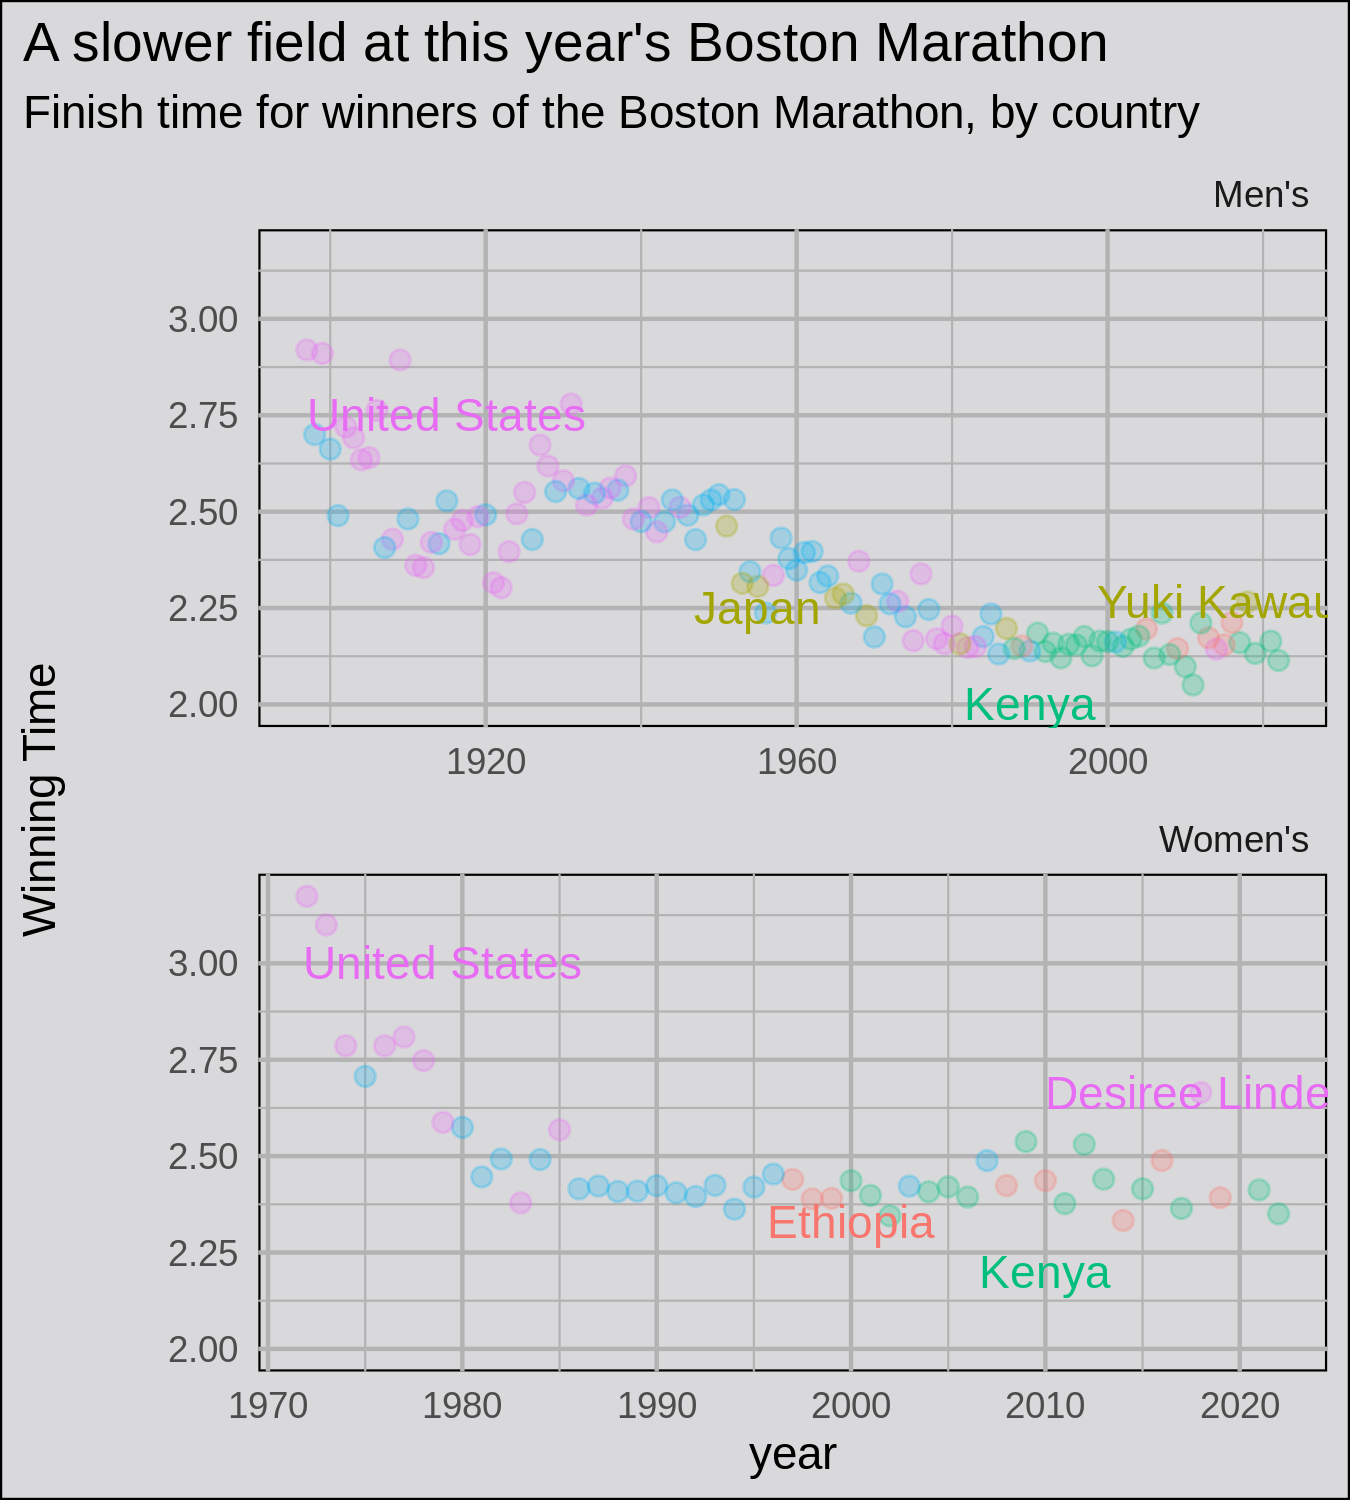

In [46]:
options(repr.plot.height = 5, repr.plot.width = 4.5)
p = ggplot(df.marathon, aes(x = year, y = race.time, color = (country = ifelse(
                country %in% c('United States', 'Ethiopia', 'Japan', 'Kenya'),
                country, 'other'
            )))) +
    geom_point(size = 2, alpha = 0.25) + 
    geom_text(data = country_names, aes(label = country)) + 
    geom_text(data = winners_2018, aes(label = name)) + 
    facet_wrap(~MF, ncol = 1, scales = 'free_x') + 
    labs(y = 'Winning Time', title = "A slower field at this year's Boston Marathon", subtitle = 'Finish time for winners of the Boston Marathon, by country') +
    theme_minimal() +
    theme(legend.position = 'none', 
          plot.title.position = 'plot',
          plot.background = element_rect(fill = '#D9D9DB'), 
          panel.background = element_rect(fill = '#D9D9DB'), 
          panel.grid = element_line(color = 'grey70'),
          strip.text = element_text(hjust = 1),
          axis.ticks = element_blank(), 
          axis.title.y = element_text(margin = margin(r = 25)))
p

What else might you visualize with this data? (e.g. What about totaling the winners from each country?)